In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics

In [4]:
# Load the data

df = pd.read_csv(r"C:\Users\choon\Documents\Chi Ling\BCSCUN\Machine Learning\MSFT(2000-2023).csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/3/2000,58.687500,59.312500,56.000000,58.281250,36.132248,53228400
1,1/4/2000,56.781250,58.562500,56.125000,56.312500,34.911709,54119000
2,1/5/2000,55.562500,58.187500,54.687500,56.906250,35.279816,64059600
3,1/6/2000,56.093750,56.937500,54.187500,55.000000,34.098019,54976600
4,1/7/2000,54.312500,56.125000,53.656250,55.718750,34.543629,62013600
...,...,...,...,...,...,...,...
6007,11/16/2023,370.959991,376.350006,370.179993,376.170013,376.170013,27182300
6008,11/17/2023,373.609985,374.369995,367.000000,369.850006,369.850006,40157000
6009,11/20/2023,371.220001,378.869995,371.000000,377.440002,377.440002,52465100
6010,11/21/2023,375.670013,376.220001,371.119995,373.070007,373.070007,28423100


In [5]:
# Check data types
print(df.dtypes)
print("\n")

# Check for null values
null_values = df.isnull().sum()
print("Null values in each column: \n")
print(null_values)
print("\n")

# Drop rows with null values if any
if null_values.any():
    df = df.dropna()
    print("Dropped rows with null values.")

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows: ", duplicate_rows)
print("\n")

df.shape

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


Null values in each column: 

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


Number of duplicate rows:  0




(6012, 7)

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6.012000e+03
mean,77.767658,78.582541,76.941528,77.786900,70.789050,5.132949e+07
std,87.008302,87.897979,86.087633,87.036507,88.438452,3.074841e+07
min,15.200000,15.620000,14.870000,15.150000,11.304623,7.425600e+06
25%,27.030001,27.299999,26.807499,27.049999,19.027981,2.865732e+07
50%,32.550001,32.997500,32.187500,32.635000,23.633584,4.605860e+07
75%,84.222498,84.727497,83.497500,84.192499,78.474423,6.504930e+07
max,378.000000,379.790009,374.970001,377.850006,377.850006,5.910522e+08


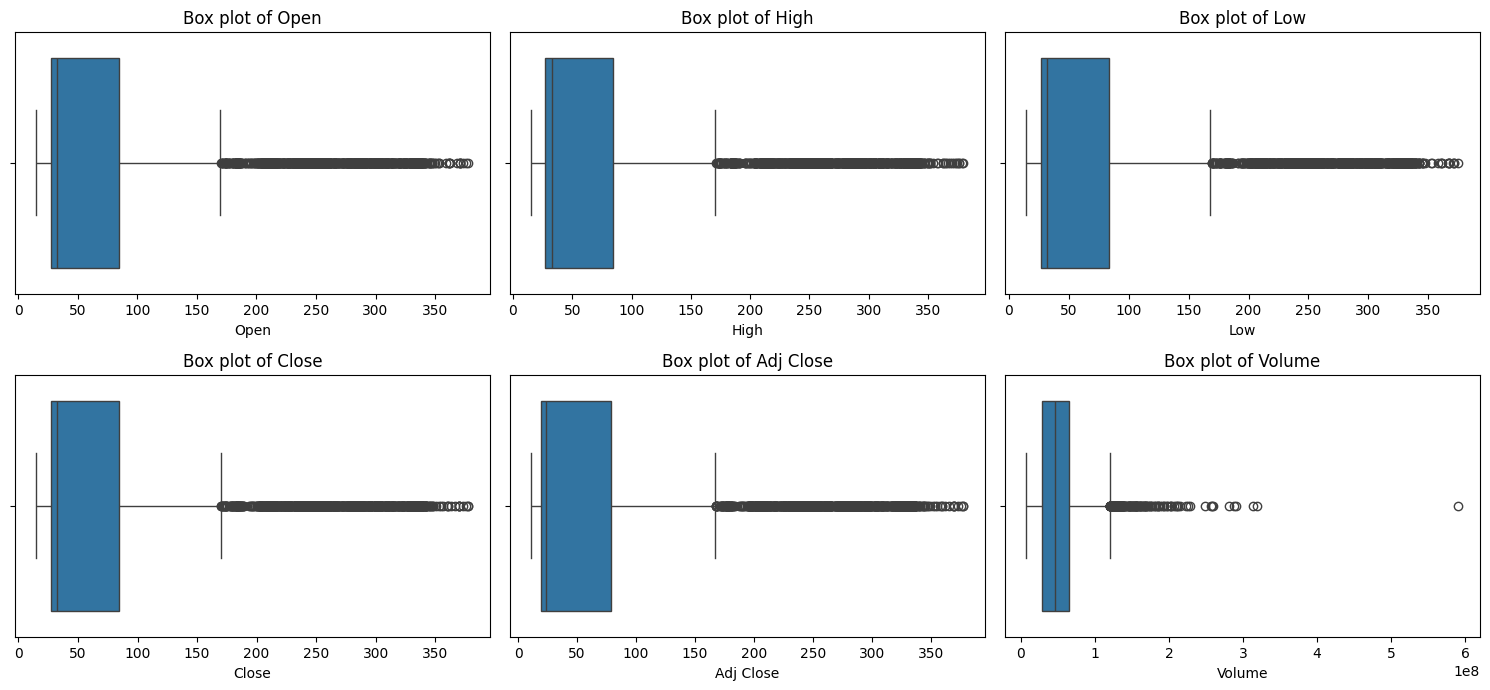

In [7]:
# Plot box plots for numerical columns to check for outliers
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # Adjusted to 3x3 grid
    sb.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()

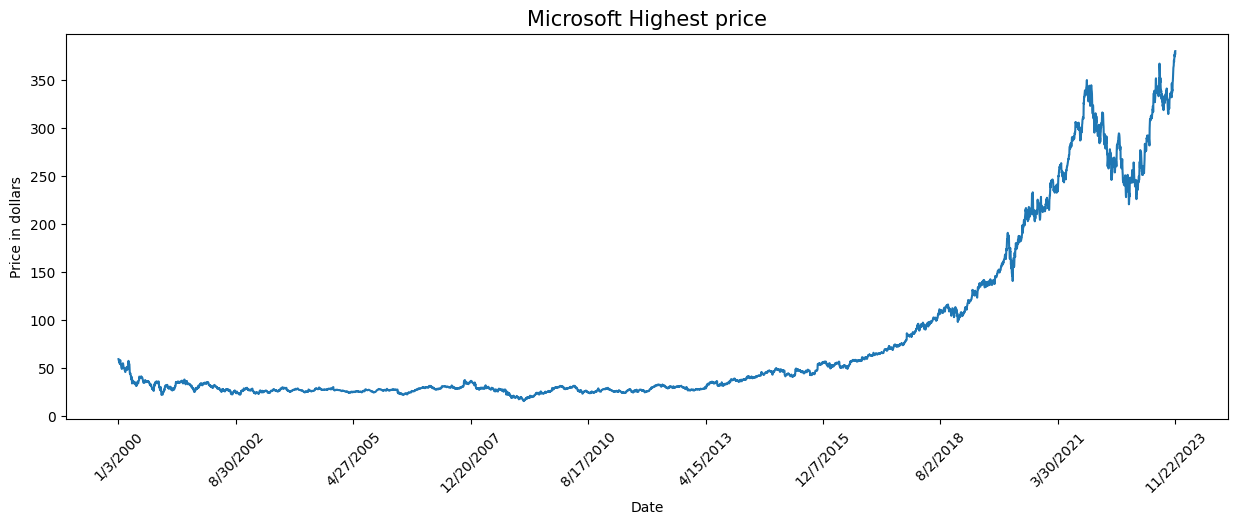

In [11]:
plt.figure(figsize=(15, 5))
plt.plot(df['Date'], df['High'])
plt.title('Microsoft Highest price', fontsize=15)
plt.xlabel('Date')
plt.ylabel('Price in dollars')

# Show only a few dates on the x-axis
num_ticks = 10  # Number of ticks you want to show
tick_positions = np.linspace(0, len(df['Date']) - 1, num_ticks, dtype=int)
tick_labels = df['Date'].iloc[tick_positions]

plt.xticks(tick_positions, tick_labels, rotation=45)  # Rotate x-axis labels for better readability
plt.show()

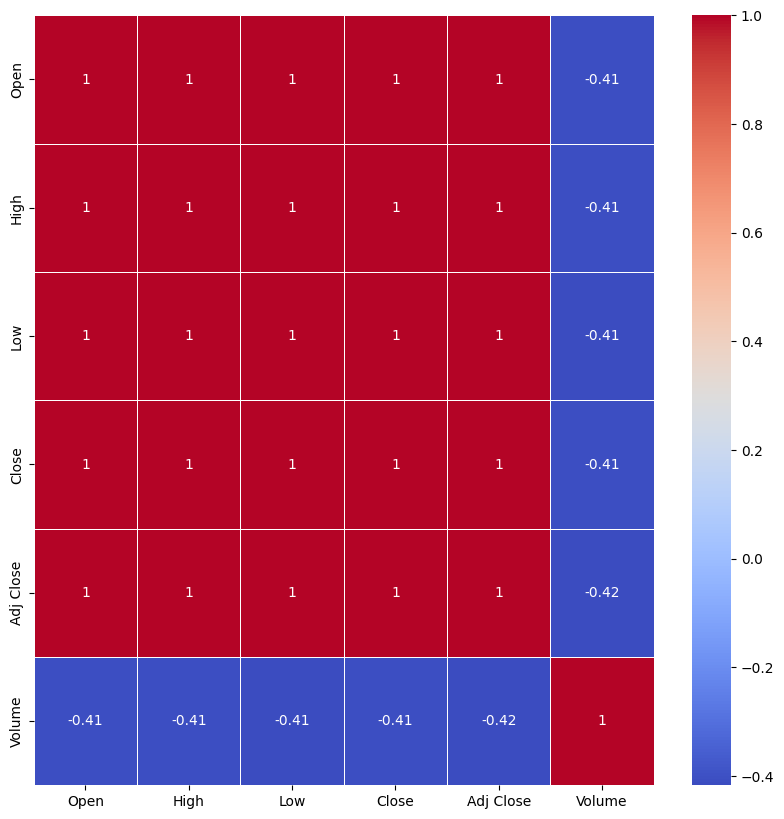

In [12]:
plt.figure(figsize=(10, 10))

# Exclude 'Date' column from correlation calculation
corr_matrix = df.drop(columns=['Date']).corr()

sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [14]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce').dt.strftime('%Y-%m-%d')
splitted = df['Date'].str.split('-', expand=True)

df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day
0,2000-01-03,58.68750,59.3125,56.00000,58.28125,36.132248,53228400,2000,1,3
1,2000-01-04,56.78125,58.5625,56.12500,56.31250,34.911709,54119000,2000,1,4
2,2000-01-05,55.56250,58.1875,54.68750,56.90625,35.279816,64059600,2000,1,5
3,2000-01-06,56.09375,56.9375,54.18750,55.00000,34.098019,54976600,2000,1,6
4,2000-01-07,54.31250,56.1250,53.65625,55.71875,34.543629,62013600,2000,1,7


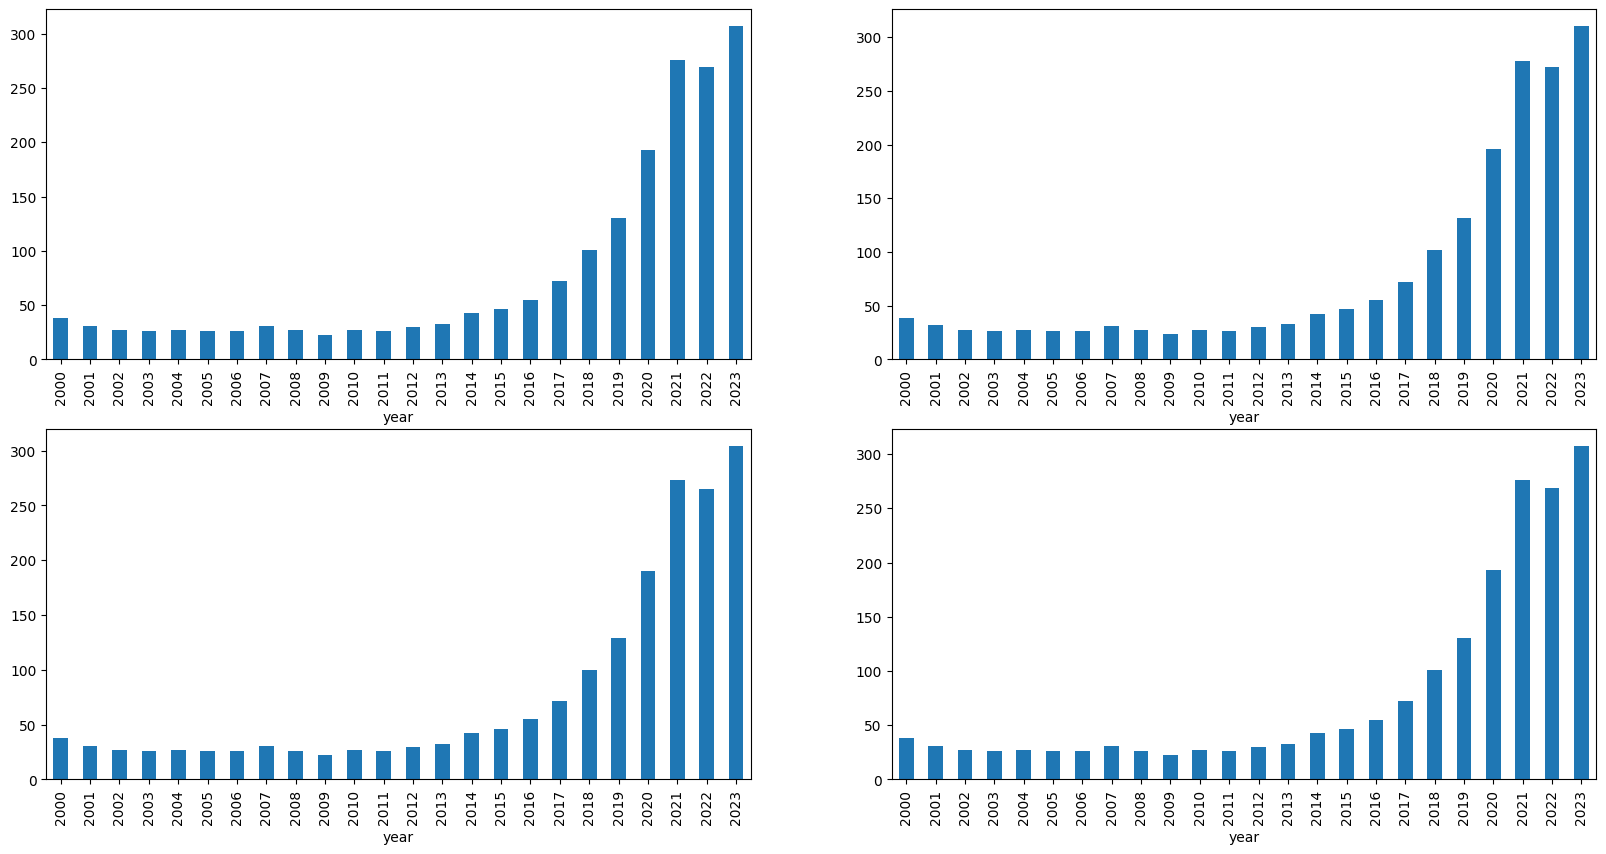

In [15]:
data_grouped = df.drop('Date', axis=1).groupby('year').mean()
plt.figure(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

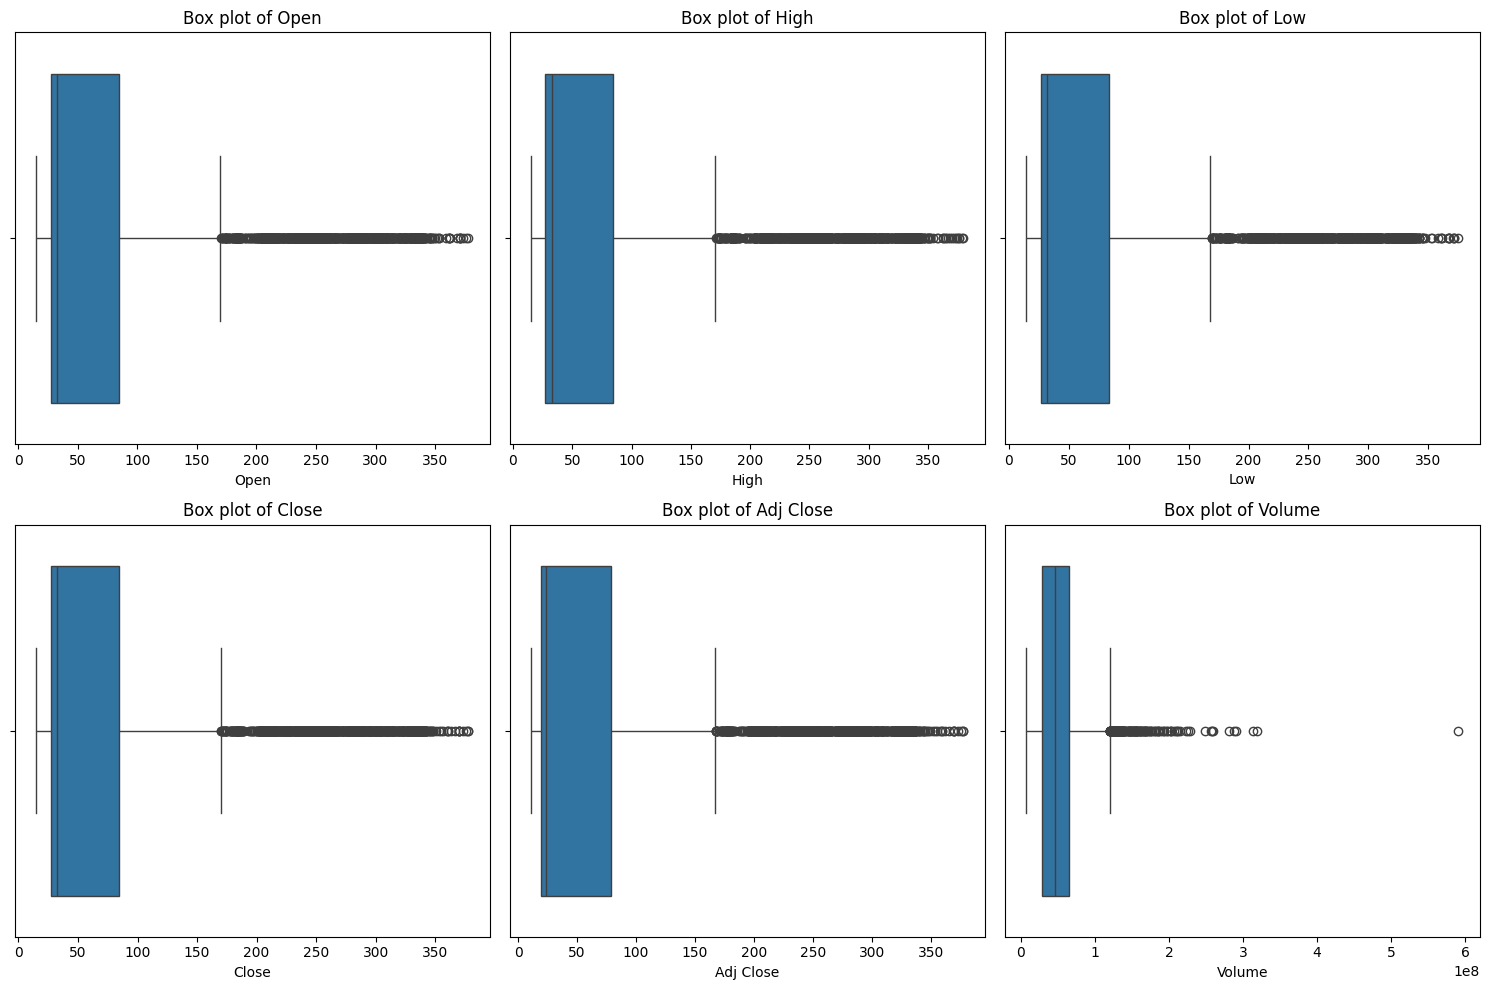

In [16]:
# Plot box plots for numerical columns to check for outliers
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sb.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()

In [17]:
# Example: Detect outliers using Z-score method
from scipy import stats

z_scores = np.abs(stats.zscore(df[['High', 'Low', 'Close', 'Volume']]))
outliers = (z_scores > 3).sum()
print("Outliers detected:\n", outliers)

Outliers detected:
 High      40
Low       47
Close     42
Volume    83
dtype: int64


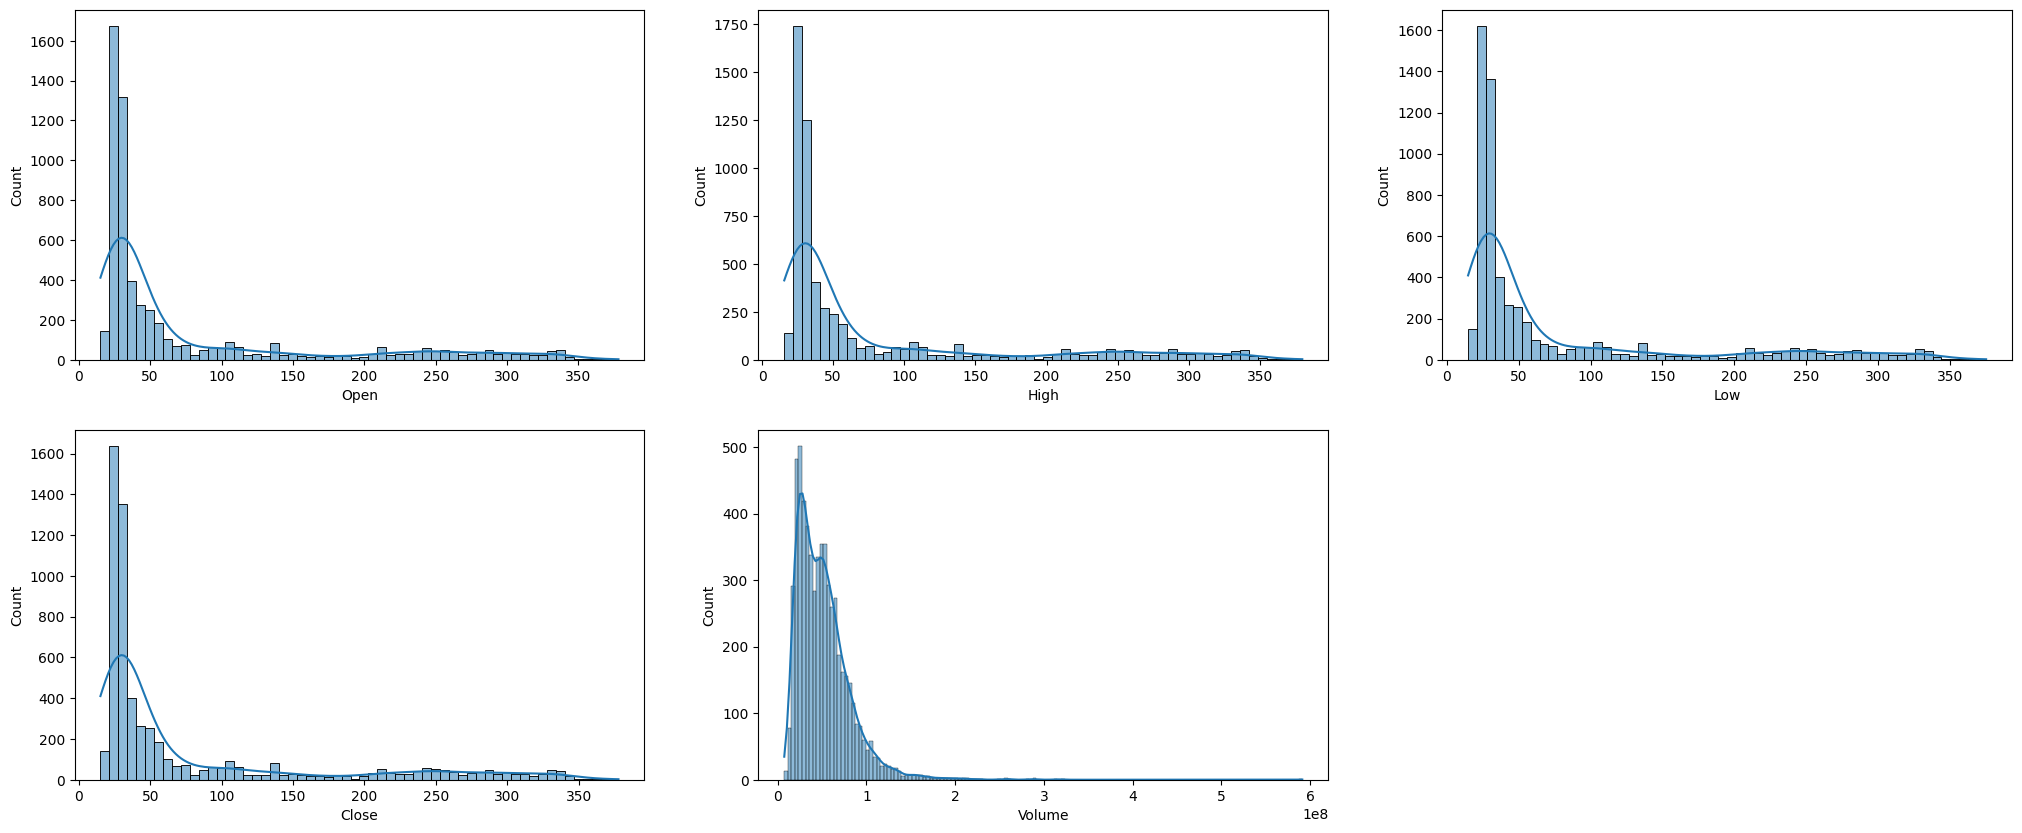

In [18]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.figure(figsize=(25, 10))

for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sb.histplot(df[col], kde=True, stat='count')
plt.show()

In [26]:
micro = df.loc[2515:6012]
micro

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day
2515,2010-01-04,30.620001,31.100000,30.590000,30.950001,23.474922,38409100,2010,1,4
2516,2010-01-05,30.850000,31.100000,30.639999,30.959999,23.482502,49749600,2010,1,5
2517,2010-01-06,30.879999,31.080000,30.520000,30.770000,23.338396,58182400,2010,1,6
2518,2010-01-07,30.629999,30.700001,30.190001,30.450001,23.095678,50559700,2010,1,7
2519,2010-01-08,30.280001,30.879999,30.240000,30.660000,23.254963,51197400,2010,1,8
...,...,...,...,...,...,...,...,...,...,...
6007,2023-11-16,370.959991,376.350006,370.179993,376.170013,376.170013,27182300,2023,11,16
6008,2023-11-17,373.609985,374.369995,367.000000,369.850006,369.850006,40157000,2023,11,17
6009,2023-11-20,371.220001,378.869995,371.000000,377.440002,377.440002,52465100,2023,11,20
6010,2023-11-21,375.670013,376.220001,371.119995,373.070007,373.070007,28423100,2023,11,21


In [28]:
# Ensure that the dataset has at least 1000 rows after preprocessing
if len(micro) < 1000:
    raise ValueError("Dataset contains fewer than 1000 samples after preprocessing.")

# Save the preprocessed dataset
micro.to_csv('microsoft_cleaned_data.csv', index=False)
print("Preprocessing complete. Dataset saved.")

Preprocessing complete. Dataset saved.
